## 🧠 Ideal Weight Prediction using Neural Network in TensorFlow
This notebook predicts a person's ideal weight using their height, age, and gender using a neural network built in TensorFlow.

In [ ]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import os

# 📁 Load dataset (works in Colab or locally)
if not os.path.exists('ideal_weight_dataset.csv'):
    try:
        from google.colab import files
        uploaded = files.upload()
    except ImportError:
        raise FileNotFoundError("Please place 'ideal_weight_dataset.csv' in the working directory.")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-94939feb1674>", line 17, in <cell line: 0>
    uploaded = files.upload()
               ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/colab/files.py", line 72, in upload
    uploaded_files = _upload_files(multiple=True)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/colab/files.py", line 164, in _upload_files
    result = _output.eval_js(
             ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/colab/output/_js.py", line 40, in eval_js
    return _message.read_reply_from_input(request_id, timeout_sec)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_message.py", line 96, in read_repl

TypeError: object of type 'NoneType' has no len()

In [ ]:
# 📥 Load and explore the dataset
df = pd.read_csv('ideal_weight_dataset.csv')

# Normalize column names
df.columns = df.columns.str.strip().str.lower()
print("Normalized columns:", df.columns.tolist())

# 🧹 Check and handle missing values
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)

# 🧼 Drop irrelevant columns (like 'name' if it's not a feature)
if 'name' in df.columns:
    df.drop('name', axis=1, inplace=True)

# 🎯 Feature selection and encoding
X = df[['height_cm', 'gender']].copy()  # Adjust to your dataset's actual columns
X['gender'] = LabelEncoder().fit_transform(X['gender'])  # Encode gender
y = df['ideal_weight_kg'].values  # Adjusted to actual column name

# 🔢 Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✂️ Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Normalized columns: ['name', 'gender', 'height_cm', 'ideal_weight_kg']
Missing values:
 name               0
gender             0
height_cm          0
ideal_weight_kg    0
dtype: int64


In [ ]:
# 🧠 Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# ⚙️ Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 🏋️‍♀️ Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=150, batch_size=16, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3993.3130 - mae: 62.4048 - val_loss: 3312.5391 - val_mae: 56.6646
Epoch 2/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3181.7595 - mae: 55.4711 - val_loss: 1320.8972 - val_mae: 34.4549
Epoch 3/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1014.3224 - mae: 28.6852 - val_loss: 220.6225 - val_mae: 10.9788
Epoch 4/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 205.6148 - mae: 11.3494 - val_loss: 122.4412 - val_mae: 8.4553
Epoch 5/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 127.4236 - mae: 9.1497 - val_loss: 87.7868 - val_mae: 6.9335
Epoch 6/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 153.3462 - mae: 9.4448 - val_loss: 63.1382 - val_mae: 5.9119
Epoch 7/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.7560 - mae: 8.4637 - val_loss: 50.7025 - val_mae: 4.9961
Epoch 8/150
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.3659 - mae: 8.2783 - val_loss: 38.3976 - val_mae: 4.2518
Epoch 9/150
45/45 ━━━━━━

In [ ]:
# 📊 Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\n📏 Test MAE: {mae:.2f} kg")

# 🔍 Compare predictions vs actuals
predictions = model.predict(X_test).flatten()
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print("\n🔍 Sample predictions:\n", comparison_df.head())



📏 Test MAE: 1.71 kg
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

🔍 Sample predictions:
    Actual  Predicted
0    53.9  53.395237
1    62.8  64.461594
2    70.8  71.794235
3    77.9  73.017525
4    57.0  58.089157


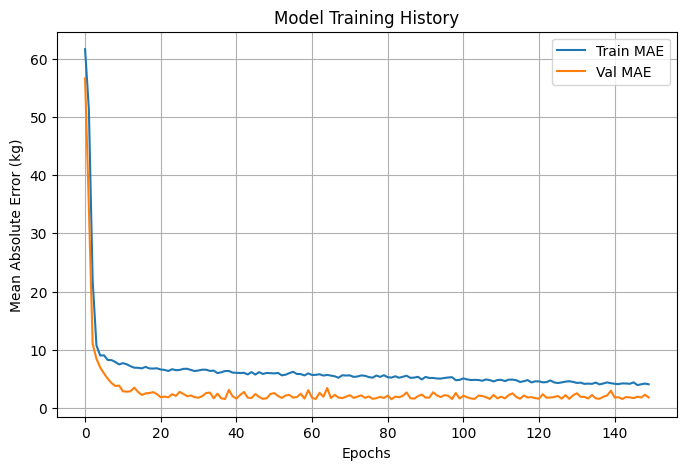

In [ ]:
# 📉 Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (kg)')
plt.title('Model Training History')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 📈 Optional: Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ideal Weight')
plt.ylabel('Predicted Ideal Weight')
plt.title('Actual vs Predicted Ideal Weight')
plt.grid(True)
plt.show()


In [ ]:
# 💾 Save the trained model
model.save('ideal_weight_neural_net_model.h5')
print("\n💾 Model saved as 'ideal_weight_neural_net_model.h5'")
